<div style="padding:10px; 
            color:black;
            margin:10px;
            font-size:170%;
            display:fill;
            border-radius:1px;
            border-style: solid;
            border-color:#f17d8e;
            background-color:#f6abb6;
            overflow:hidden;">
    <center>
        <a id='top'></a>
        <b>Table of Contents</b>
    </center>
    <br>
    <ul>
        <li>
            <a href="#1" style="color:black">1 - Imports</a>
        </li>
        <li>
            <a href="#2" style="color:black">2 - Data Analysis</a>
        </li>
        <li>
            <a href="#3" style="color:black">3 - Feature Selection</a>
        </li>
        <li>
            <a href="#4" style="color:black">4 - Model Evaluation</a>
            <ul>
                <li>
                    <a href="#4-1" style="color:black">4.1 - Logistic Regression</a>
                </li>
                <li>
                    <a href="#4-2" style="color:black">4.2 - DecisionTree</a>
                </li>
                <li>
                    <a href="#4-3" style="color:black">4.3 - KNearestNeighbors</a>
                </li>
                <li>
                    <a href="#4-4" style="color:black">4.4 - RandomForestClassifier</a>
                </li>
                <li>
                    <a href="#4-5" style="color:black">4.5 - XGBoost</a>
                </li>
                <li>
                    <a href="#4-6" style="color:black">4.6 - Catboost</a>
                </li>
                <li>
                    <a href="#4-7" style="color:black">4.7 - LGBM</a>
                </li>
                <li>
                    <a href="#4-7" style="color:black">4.8 -Ensemble</a>
                </li>
                <li>
                    <a href="#4-7" style="color:black">4.9 - Neural Network</a>
                </li>
            </ul>
        </li>
        <li>
            <a href="#6" style="color:black">6 - Evaluation</a>
        </li>
        <li>
            <a href="#7" style="color:black">7 - Conclusion</a>
        </li>
        <li>
            <a href="#8" style="color:black">8 - Thank You</a>
        </li>
    </ul>
</div>
<a id="1"></a>

<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: black;'>Imports</center></h1>

In [59]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

<a id="2"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Analysis</center></h1>
    
# Data Analysis

Boston House Price dataset has 14 features and their description is given as follows:

1. **CRIM** per capita crime rate by town
2. **ZN** proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS** proportion of non-retail business acres per town
4. **CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. **NOX** nitric oxides concentration (parts per 10 million)
6. **RM** average number of rooms per dwelling
7. **AGE** proportion of owner-occupied units built prior to 1940
8. **DIS** weighted distances to five Boston employment centres
9. **RAD** index of accessibility to radial highways
10. **TAX** full-value property-tax rate per dollar 10,000.
11. **PTRATIO** pupil-teacher ratio by town
12. **B** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. **LSTAT** % lower status of the population
14. **MEDV** Median value of owner-occupied homes in $1000's

In [60]:
name= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(filepath_or_buffer="C:/Users/Fares/Desktop/housing.csv",delim_whitespace=True,names=name)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [62]:
for column in df.columns:
    fig = px.box(data_frame=df,y=column,orientation='v', color_discrete_sequence=['pink'], template='ggplot2')
    fig.show()

In [63]:
for column in df.columns:
    fig = px.histogram(data_frame=df, x=column, nbins=50, color_discrete_sequence=['pink'], template= 'ggplot2')
    fig.show()

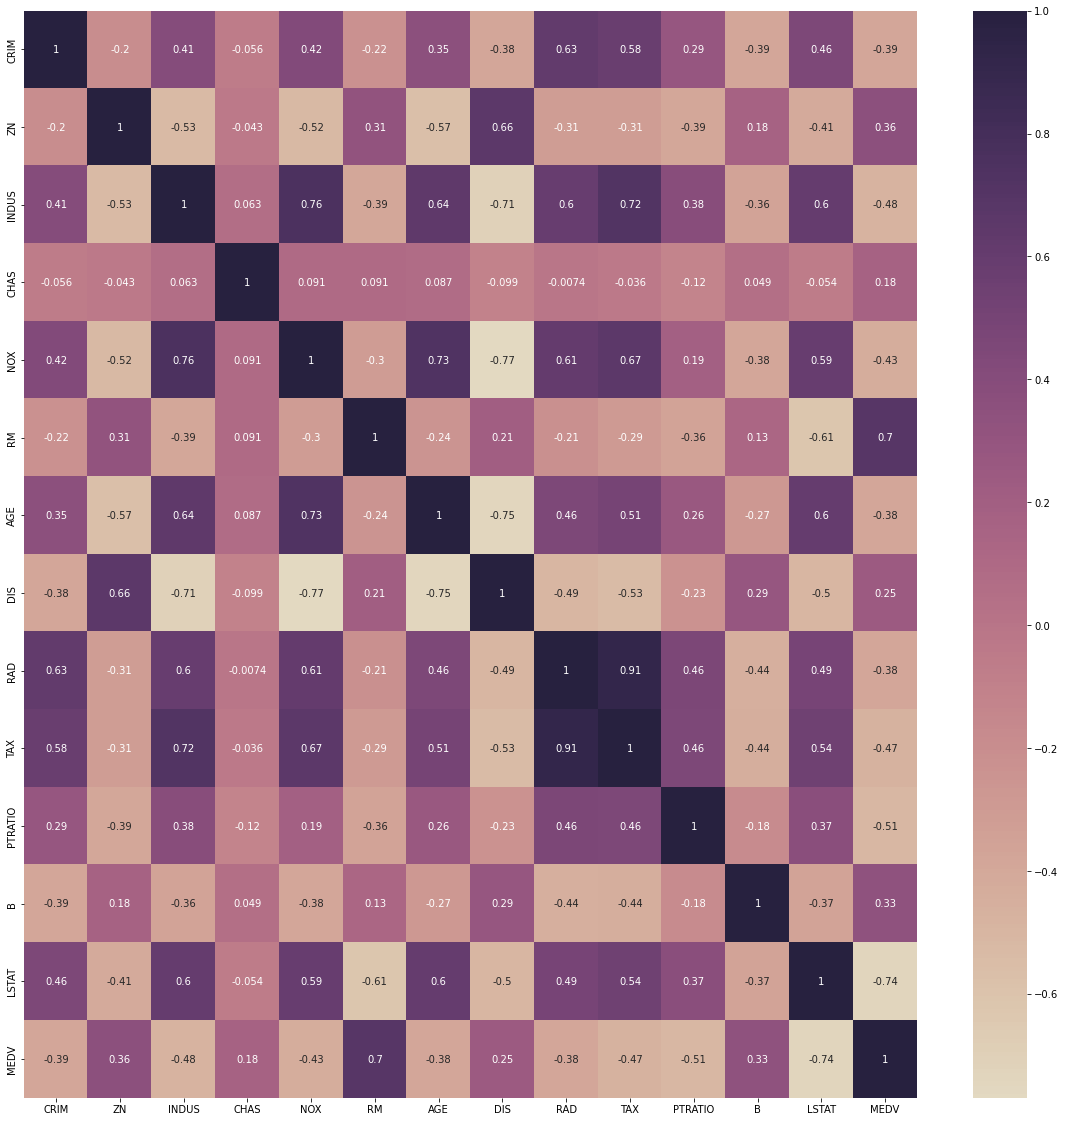

In [64]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

<a id="3"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Feature Selection</center></h1>
    
# Feature Selection

In [65]:
# Get the absolute value of the correlation
cor_target = abs(corr["MEDV"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('MEDV')

# Display the results
print(names)

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [66]:
# Select highly correlated features with the target
X = df[names].values
y = df['MEDV'].values

# Scale the input features using StandardScaler
scaler = StandardScaler() # Initialize StandardScaler object
X = scaler.fit_transform(X) # Scale the input features and replace the original X with the scaled version

<a id="4"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Model Evaluation</center></h1>
    
# Model Evaluation

In [67]:
def train_evaluate_model(model, X, y, n_splits=5, is_nn=False, epochs=200):
    '''
    Trains and evaluates a regression model using KFold cross-validation.

    Args:
        model (object): A regression Machine Learning model
        X (numpy.ndarray): The input features for the model.
        y (numpy.ndarray): The target variable for the model.
        n_splits (int, optional): The number of folds to use in the KFold cross-validation (default=5).
        is_nn (bool, optional): Whether the model is a neural network or not (default=False).
        epochs (int, optional): The number of epochs to train the neural network for (default=200).

    Returns:
        A pandas.DataFrame object containing the mean and standard deviation of the evaluation metrics.
    '''

    # Initialize a KFold cross-validation object with the specified number of folds
    # and shuffle the data while keeping a fixed random seed for reproducibility
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize two empty lists to store the mean squared error and R-squared scores for each fold
    mse_scores = []
    r2_scores = []

    # Use KFold cross-validation to evaluate the model
    for train_index, test_index in kf.split(X, y):
        # Split the data into training and test sets for the current fold
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]

        # Fit the model to the training data
        if is_nn:
            # If the model is a neural network, train it for the specified number of epochs
            model.fit(X_train, y_train, epochs=epochs, verbose=0)
        else:
            # Otherwise, fit the model to the training data using the default parameters
            model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = model.predict(X_test)

        # Compute the mean squared error and R-squared scores for the predictions
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Append the scores to the lists for the current fold
        mse_scores.append(mse)
        r2_scores.append(r2)

    # Compute the mean and standard deviation of the evaluation metrics across all folds
    mse_mean = np.mean(mse_scores)
    mse_std = np.std(mse_scores)
    r2_mean = np.mean(r2_scores)
    r2_std = np.std(r2_scores)

    # Create a pandas DataFrame object to store the evaluation metrics
    eval_df = pd.DataFrame({
        'Mean_Squared_Error': [mse_mean],
        'MSE Std Dev': [mse_std],
        'R_squared': [r2_mean],
        'R2 Std Dev': [r2_std]
    })

    return eval_df

<a name="4-1"></a>
## Linear Regression


In [68]:
lr = LinearRegression()
results = train_evaluate_model(lr, X, y, 10)
results.index = ['LinearRegression']

In [69]:
results.sort_values(by='Mean_Squared_Error',ascending=True).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,Mean_Squared_Error,MSE Std Dev,R_squared,R2 Std Dev
LinearRegression,23.683410,6.199324,0.713155,0.076926


<a name="4-2"></a>
## Decision Tree 

In [70]:
decision_tree = DecisionTreeRegressor()
decision_tree_results = train_evaluate_model(decision_tree, X, y, 10)

decision_tree_results.index = ['DecisionTree']

results = results.append(decision_tree_results)

In [71]:
results.sort_values(by='Mean_Squared_Error',ascending=True).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,Mean_Squared_Error,MSE Std Dev,R_squared,R2 Std Dev
DecisionTree,17.689085,8.109157,0.794039,0.074257
LinearRegression,23.683410,6.199324,0.713155,0.076926


<a name="4-3"></a>
## KNearestNeighbors

In [72]:
KNN = KNeighborsRegressor(n_neighbors=7)
knn = train_evaluate_model(KNN, X, y, 10)
knn.index =['KNearsNeighbors']
results = results.append(knn)

In [73]:
results.sort_values(by='Mean_Squared_Error',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,Mean_Squared_Error,MSE Std Dev,R_squared,R2 Std Dev
LinearRegression,23.683410,6.199324,0.713155,0.076926
DecisionTree,17.689085,8.109157,0.794039,0.074257
KNearsNeighbors,16.045645,4.152570,0.803845,0.062531


In [74]:
rfr= RandomForestRegressor(n_estimators=1000)
rfr_result = train_evaluate_model(rfr, X, y, 10)
rfr_result.index = ['RandomForest']

results = results.append(rfr_result)

<a name="4-4"></a>
## RandomForestRegressor

In [75]:
results.sort_values(by='Mean_Squared_Error',ascending=True).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,Mean_Squared_Error,MSE Std Dev,R_squared,R2 Std Dev
RandomForest,10.279820,3.667066,0.876399,0.037642
KNearsNeighbors,16.045645,4.152570,0.803845,0.062531
DecisionTree,17.689085,8.109157,0.794039,0.074257
LinearRegression,23.683410,6.199324,0.713155,0.076926


<a name="4-5"></a>
## XGBoost

In [76]:
xgboost = xgb.XGBRegressor(n_estimators=1000)
xgboost_result = train_evaluate_model(xgboost, X, y, 10)
xgboost_result.index = ['XGBoost']

results = results.append(xgboost_result)

In [77]:
results.sort_values(by='Mean_Squared_Error',ascending=True).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,Mean_Squared_Error,MSE Std Dev,R_squared,R2 Std Dev
XGBoost,8.874268,3.702513,0.895658,0.035520
RandomForest,10.279820,3.667066,0.876399,0.037642
KNearsNeighbors,16.045645,4.152570,0.803845,0.062531
DecisionTree,17.689085,8.109157,0.794039,0.074257
LinearRegression,23.683410,6.199324,0.713155,0.076926


<a name="4-6"></a>
## CatBoost

In [78]:
catboost = CatBoostRegressor(verbose=False)
catboost_result = train_evaluate_model(catboost, X, y, 10)
catboost_result.index = ['Catboost']

results = results.append(catboost_result)

In [79]:
results.sort_values(by='Mean_Squared_Error',ascending=True).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,Mean_Squared_Error,MSE Std Dev,R_squared,R2 Std Dev
Catboost,8.628627,3.036018,0.896715,0.032140
XGBoost,8.874268,3.702513,0.895658,0.035520
RandomForest,10.279820,3.667066,0.876399,0.037642
KNearsNeighbors,16.045645,4.152570,0.803845,0.062531
DecisionTree,17.689085,8.109157,0.794039,0.074257
LinearRegression,23.683410,6.199324,0.713155,0.076926


<a name="4-7"></a>
## LightGradient Boost

In [80]:
lgbmr = LGBMRegressor()
lgbmr_result = train_evaluate_model(lgbmr, X, y, 10)
lgbmr_result.index = ['LGBM']

results = results.append(lgbmr_result)

In [81]:
results.sort_values(by='Mean_Squared_Error',ascending=True).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,Mean_Squared_Error,MSE Std Dev,R_squared,R2 Std Dev
Catboost,8.628627,3.036018,0.896715,0.032140
XGBoost,8.874268,3.702513,0.895658,0.035520
LGBM,10.270046,4.841333,0.873677,0.064521
RandomForest,10.279820,3.667066,0.876399,0.037642
KNearsNeighbors,16.045645,4.152570,0.803845,0.062531
DecisionTree,17.689085,8.109157,0.794039,0.074257
LinearRegression,23.683410,6.199324,0.713155,0.076926


<a name="4-8"></a>
## Ensembling

In [82]:
regressors = [('lgbmr', LGBMRegressor()),('catboost', CatBoostRegressor(verbose=False)), ('xgb', xgb.XGBRegressor())]
voting_regressor = VotingRegressor(regressors)
voting_regressor_result = train_evaluate_model(voting_regressor, X, y, 10)
voting_regressor_result.index = ['Ensemble']

results = results.append(voting_regressor_result)

In [83]:
results.sort_values(by='Mean_Squared_Error',ascending=True).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,Mean_Squared_Error,MSE Std Dev,R_squared,R2 Std Dev
Ensemble,8.397802,3.278979,0.899118,0.036130
Catboost,8.628627,3.036018,0.896715,0.032140
XGBoost,8.874268,3.702513,0.895658,0.035520
LGBM,10.270046,4.841333,0.873677,0.064521
RandomForest,10.279820,3.667066,0.876399,0.037642
KNearsNeighbors,16.045645,4.152570,0.803845,0.062531
DecisionTree,17.689085,8.109157,0.794039,0.074257
LinearRegression,23.683410,6.199324,0.713155,0.076926


<a name="4-9"></a>
## Neural Network

In [84]:
# Define the initializer for the weights in the model
initializer = tf.keras.initializers.RandomNormal(seed=0)

# Define a function that schedules the learning rate during training
def scheduler(epoch, lr):
    if epoch < 100:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Create a callback for the learning rate scheduler function
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Define the input layer of the model with the same shape as X
inputs = Input(shape=X.shape[-1])

# Add three dense layers with ReLU activation and the random normal initializer to the model
x = Dense(512, activation='relu', kernel_initializer=initializer)(inputs)
x = Dense(512, activation='relu', kernel_initializer=initializer)(x)
x = Dense(128, activation='relu', kernel_initializer=initializer)(x)

# Add the output layer to the model with no activation function and the random normal initializer
x = Dense(1, kernel_initializer=initializer)(x)

# Create the model
model = Model(inputs=inputs, outputs=x)

# Compile the model with Adam optimizer, mean squared error loss, and mean squared error metric
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train and evaluate the model 
nn_results = train_evaluate_model(model, X, y, 10, is_nn=True)
nn_results.index = ['NeuralNetwork']
results = results.append(nn_results)

In [85]:
results.sort_values(by='Mean_Squared_Error',ascending=True).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,Mean_Squared_Error,MSE Std Dev,R_squared,R2 Std Dev
NeuralNetwork,1.622862,1.959090,0.977959,0.031157
Ensemble,8.397802,3.278979,0.899118,0.036130
Catboost,8.628627,3.036018,0.896715,0.032140
XGBoost,8.874268,3.702513,0.895658,0.035520
LGBM,10.270046,4.841333,0.873677,0.064521
RandomForest,10.279820,3.667066,0.876399,0.037642
KNearsNeighbors,16.045645,4.152570,0.803845,0.062531
DecisionTree,17.689085,8.109157,0.794039,0.074257
LinearRegression,23.683410,6.199324,0.713155,0.076926


#### 

<a id="5"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Evaluation</center></h1>
    
# Evaluation

In [86]:
models = results.T.columns.values

In [87]:
fig = px.bar(
    x=results.iloc[:9, 0].values,
    y=models,
    orientation='h',
    color=results['Mean_Squared_Error'].iloc[:9],
    color_continuous_scale='rdpu_r',  
    template="seaborn"
)

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Mean_Squared_Error'),
                 yaxis=dict(title="Models"))

fig.show()

In [88]:
fig = px.bar(
    x=results.iloc[:9, 2].values,
    y=models,
    orientation='h',
    color=results['R_squared'].iloc[:9],
    color_continuous_scale='rdpu',  
    template="seaborn"
)

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='R_squared'),
                 yaxis=dict(title="Models"))

fig.show()

In [89]:
fig = px.bar(
    x=results.iloc[:9, 1].values,
    y=models,
    orientation='h',
    color=results['MSE Std Dev'].iloc[:9],
    color_continuous_scale='rdpu_r',  
    template="seaborn"
)

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='MSE Std Dev'),
                 yaxis=dict(title="Models"))

fig.show()

In [90]:
fig = px.bar(
    x=results.iloc[:9, 3].values,
    y=models,
    orientation='h',
    color=results['R2 Std Dev'].iloc[:9],
    color_continuous_scale='rdpu_r',  
    template="seaborn"
)

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='R2 Std Dev'),
                 yaxis=dict(title="Models"))

fig.show()

<a id="6"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Conclusion</center></h1>
    
    
# Conclusion

**In conclusion, the results of our study indicate that the Neural Network algorithm surpasses other algorithms in terms of performance.** 
 

<a id="7"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Thank You</center></h1>
    
# Thank You


**Thank you  for going through  this notebook**
 

**If you have any feedback please let me know**

